<a href="https://colab.research.google.com/github/kaylaque/senyumin/blob/main/Test_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Convert H5 to tflite


[sumber](https://oleksandrg.medium.com/how-to-convert-h5-model-to-tflite-model-afef2bee6a6)


In [1]:
model_h5 = '/content/drive/MyDrive/dsc (1)/PLAN B [ONGOING]/Senyumin/model_kerasScratch.h5'

In [2]:
import tensorflow as tf

model = tf.keras.models.load_model(model_h5)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("kerasScratch.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpkwv8g6t7/assets


109234852

In [3]:
!mv ./kerasScratch.tflite '/content/drive/MyDrive/dsc (1)/PLAN B [ONGOING]/Senyumin/'

## Test Keras Model VGG19

input requirement: grayscale with 3 channels RGB, size 150x150. 

label:

```
{'angry': 0, 'disgust': 1, 'happy': 2, 'sad': 3, 'surprised': 4}
```

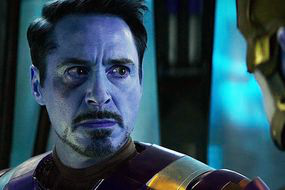

In [ ]:
from keras.models import load_model
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

model = load_model(model_h5)
# path = '/content/drive/MyDrive/dsc (1)/PLAN B [ONGOING]/test_data/WIN_20191013_12_14_05_Pro (2).jpg'
path = 'https://cdn.images.express.co.uk/img/dynamic/36/285x190/1122911_1.jpg'
#img = cv2.imread(path) #if using local folder

from skimage import io #if using url
img = io.imread(path)
cv2_imshow(img)

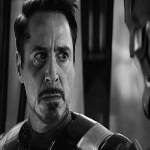

(150, 150, 3)


In [ ]:
# img_gray_mode = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
img_gray_mode = cv2.resize(img,(150,150))
img_gray_mode = cv2.cvtColor(img_gray_mode, cv2.COLOR_BGR2GRAY)
img_gray_mode = cv2.cvtColor(img_gray_mode, cv2.COLOR_GRAY2BGR)
cv2_imshow(img_gray_mode)
print(img_gray_mode.shape)

In [ ]:
img_gray_mode = np.reshape(img_gray_mode,[1,150,150,3])
classes = model.predict(img_gray_mode)
print(classes)

if max(classes[0]) == classes[0][0]:
  print('angry')
elif max(classes[0]) == classes[0][1]:
  print('disgust')
elif max(classes[0]) == classes[0][2]:
  print('happy')
elif max(classes[0]) == classes[0][3]:
  print('sad')
else:
  print('surprise')

[[0.13160808 0.01629872 0.35373092 0.41973537 0.0786269 ]]
sad


## Test Keras Model from scratch

input requirement: grayscale with 3 channels RGB, size 224x224. 

label:

```
{'angry': 0, 'disgust': 1, 'happy': 2, 'sad': 3, 'surprised': 4}
```

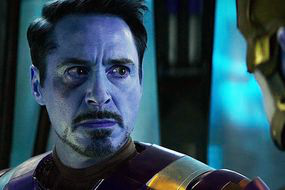

In [4]:
from keras.models import load_model
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

model = load_model(model_h5)
# path = '/content/drive/MyDrive/dsc (1)/PLAN B [ONGOING]/test_data/WIN_20191013_12_14_05_Pro (2).jpg'
path = 'https://cdn.images.express.co.uk/img/dynamic/36/285x190/1122911_1.jpg'
#img = cv2.imread(path) #if using local folder

from skimage import io #if using url
img = io.imread(path)
cv2_imshow(img)

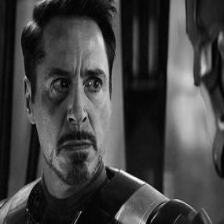

(224, 224, 3)


In [6]:
# img_gray_mode = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
img_gray_mode = cv2.resize(img,(224,224))
img_gray_mode = cv2.cvtColor(img_gray_mode, cv2.COLOR_BGR2GRAY)
img_gray_mode = cv2.cvtColor(img_gray_mode, cv2.COLOR_GRAY2BGR)
cv2_imshow(img_gray_mode)
print(img_gray_mode.shape)

In [8]:
img_gray_mode = np.reshape(img_gray_mode,[1,224,224,3])
classes = model.predict(img_gray_mode)
print(classes)

if max(classes[0]) == classes[0][0]:
  print('angry')
elif max(classes[0]) == classes[0][1]:
  print('disgust')
elif max(classes[0]) == classes[0][2]:
  print('happy')
elif max(classes[0]) == classes[0][3]:
  print('sad')
else:
  print('surprise')

[[9.9992442e-01 0.0000000e+00 2.1347695e-15 7.5517273e-05 0.0000000e+00]]
angry
